## Importing Libraries


In [1]:
from sklearn.datasets import load_digits
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.metrics import classification_report

## Description Of the Dataset

In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.target.size

1797

## **Visualization**

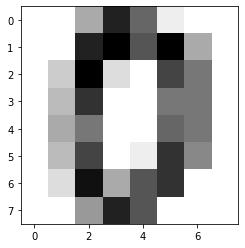

In [7]:
plt.gray
plt.imshow(digits.images[0],cmap=plt.cm.gray_r) 

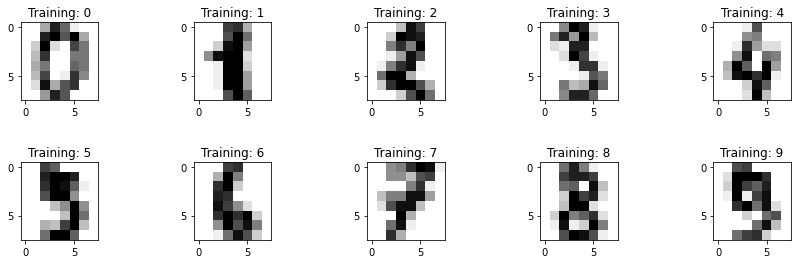

In [8]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label, fontsize =12)

In [9]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

## CASE - 1
### Splitting the dataset with test size as 0.01

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.01, random_state=0)


## Training and Prediction Using SVC

In [11]:
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
y_pred = svc.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0])

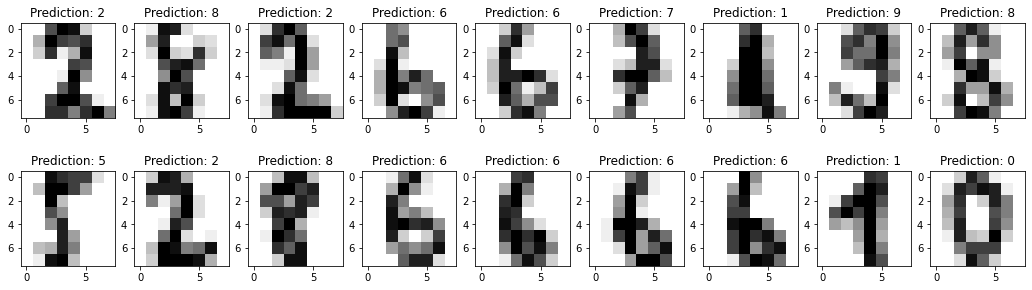

In [13]:
images_and_predictions = list(zip(x_test,y_pred))

plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:19]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

# save the figure
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')

In [14]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))
cr=classification_report(y_test, y_pred)
print("\nClassification report for SVM classifier:\n\n",cr)

Accuracy Score: 1.0

Classification report for SVM classifier:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



### For Test Case-1, the accuracy is found to be 100%

## CASE - 2

### Splitting the dataset with test size as 0.7

In [15]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.7, random_state=0)
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [16]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))
cr=classification_report(y_test, y_pred)
print("\nClassification report for SVM classifier:\n\n",cr)

Accuracy Score: 0.9841017488076311

Classification report for SVM classifier:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       0.97      0.99      0.98       124
           2       1.00      0.98      0.99       120
           3       0.98      0.99      0.98       129
           4       0.99      1.00      1.00       120
           5       0.97      0.96      0.97       140
           6       0.99      0.99      0.99       127
           7       0.98      1.00      0.99       116
           8       0.99      0.94      0.96       128
           9       0.97      0.98      0.98       125

    accuracy                           0.98      1258
   macro avg       0.98      0.98      0.98      1258
weighted avg       0.98      0.98      0.98      1258



### For Test Case-2, the accuracy is found to be 98.4%

## CASE - 3

### Splitting the dataset with test size as 0.9

In [19]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.9, random_state=0)
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [20]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))
cr=classification_report(y_test, y_pred)
print("\nClassification report for SVM classifier:\n\n",cr)

Accuracy Score: 0.9684796044499382

Classification report for SVM classifier:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       161
           1       0.95      0.99      0.97       163
           2       0.99      0.99      0.99       159
           3       0.98      0.95      0.96       168
           4       0.98      0.98      0.98       159
           5       0.95      0.96      0.96       161
           6       0.99      0.98      0.99       166
           7       0.97      0.97      0.97       159
           8       0.95      0.89      0.92       161
           9       0.91      0.97      0.94       161

    accuracy                           0.97      1618
   macro avg       0.97      0.97      0.97      1618
weighted avg       0.97      0.97      0.97      1618



### For Test Case-3, the accuracy is found to be 96.8%